<a href="https://colab.research.google.com/github/YunusovYF/neural_networks/blob/main/%D0%A0%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B8_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_Ultra_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание Ultra pro

Найдите любую базу, подходящую для регрессии:

1. Сделайте парсинг и обработку данных.
2. Разделите данные на обучающую и проверочную выборки
3. Напишите сеть для регрессии
4. Сделайте визуализацию результата
5. Напишите ваши результаты и выводы

In [ ]:
# Импорт библиотек
import numpy as np
import pandas as pd

from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import LambdaCallback

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

import random
import math
import re
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import clear_output
import time
from tensorflow.keras.callbacks import Callback
import tensorflow
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Подгружаем датасет
df = pd.read_csv('/content/drive/MyDrive/Baza/ksprojects.csv', sep=',')
df=df.drop('ID',1)
df=df.drop('deadline',1)
df=df.drop('launched',1)
df=df.drop('state',1)
df=df.drop('country',1)
df=df.drop('usd pledged',1)
data = df.values

In [ ]:
df.head(5)

,name,category,main_category,currency,goal,pledged,backers,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,1000.0,0.0,0,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,30000.0,2421.0,15,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,USD,45000.0,220.0,3,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,5000.0,1.0,1,1.0,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,19500.0,1283.0,14,1283.0,19500.00


In [ ]:
print(df.columns)

Index(['name', 'category', 'main_category', 'currency', 'goal', 'pledged',
       'backers', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


In [ ]:
print(df.columns[7])
print(max(df['usd_goal_real']))

usd_pledged_real
166361390.71


In [ ]:
# Получаем название проекта
def getName(d):
  nameStr = d[0]

  return nameStr

# Получаем подкатегорию
def getCategory(d):
  categoryStr = d[1]
  categoryVariants = ['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants', 'Food',
                      'Drinks', 'Product Design', 'Documentary', 'Nonfiction', 'Indie Rock',
                      'Crafts', 'Games', 'Tabletop Games', 'Design', 'Comic Books', 'Art Books',
                      'Fashion', 'Childrenswear', 'Theater', 'Comics', 'DIY', 'Webseries',
                      'Animation', 'Food Trucks', 'Public Art', 'Illustration', 'Photography', 'Pop',
                      'People', 'Art', 'Family', 'Fiction', 'Accessories', 'Rock', 'Hardware',
                      'Software', 'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear', 'Festivals',
                      'Video Games', 'Anthologies', 'Publishing', 'Shorts', 'Electronic Music',
                      'Radio & Podcasts', 'Apps', 'Cookbooks', 'Apparel', 'Metal', 'Comedy',
                      'Hip-Hop', 'Periodicals', 'Dance', 'Technology', 'Painting', 'World Music',
                      'Photobooks', 'Drama', 'Architecture', 'Young Adult', 'Latin', 'Mobile Games',
                      'Flight', 'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk',
                      'Thrillers', "Children's Books", 'Audio', 'Performance Art', 'Ceramics',
                      'Vegan', 'Graphic Novels', 'Fabrication Tools', 'Performances', 'Sculpture',
                      'Sound', 'Stationery', 'Print', "Farmer's Markets", 'Events',
                      'Classical Music', 'Graphic Design', 'Spaces', 'Country & Folk', 'Wearables',
                      'Mixed Media', 'Journalism', 'Movie Theaters', 'Animals', 'Digital Art',
                      'Horror', 'Knitting', 'Small Batch', 'Installations', 'Community Gardens',
                      'DIY Electronics', 'Embroidery', 'Camera Equipment', 'Jewelry', 'Farms',
                      'Conceptual Art', 'Fantasy', 'Webcomics', 'Experimental', 'Science Fiction',
                      'Puzzles', 'R&B', 'Music Videos', 'Calendars', 'Video', 'Plays', 'Blues',
                      'Bacon', 'Faith', 'Live Games', 'Woodworking', 'Places', 'Footwear',
                      '3D Printing', 'Academic', 'Zines', 'Musical', 'Workshops', 'Photo',
                      'Immersive', 'Letterpress', 'Gaming Hardware', 'Candles', 'Television',
                      'Space Exploration', 'Couture', 'Nature', 'Robots', 'Typography', 'Crochet',
                      'Translations', 'Textiles', 'Pottery', 'Interactive Design', 'Video Art',
                      'Quilts', 'Glass', 'Pet Fashion', 'Printing', 'Romance', 'Civic Design', 'Kids',
                      'Literary Journals', 'Taxidermy', 'Literary Spaces', 'Chiptune', 'Residencies']

  if (categoryStr == categoryStr):
    category = categoryVariants.index(categoryStr)+1
  else:
    category = 0

  category = utils.to_categorical(category, 160)
  
  return category

# Получаем основную категорию
def getMainCategory(d):
  mainCategoryStr = d[2]
  mainCategoryVariants = ['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts', 'Games', 
                     'Comics', 'Fashion', 'Theater', 'Art', 'Photography', 'Technology', 'Dance', 
                     'Journalism']
  if (mainCategoryStr == mainCategoryStr):
    mainCategory = mainCategoryVariants.index(mainCategoryStr)+1
  else:
    mainCategory = 0

  mainCategory = utils.to_categorical(mainCategory, 16)
  
  return mainCategory

# Получаем валюту
def getCurrency(d):
  currencyStr = d[3]
  currencyVariants = ['GBP', 'USD', 'CAD', 'AUD', 'NOK', 'EUR', 'MXN', 'SEK', 'NZD', 'CHF', 
                      'DKK', 'HKD','SGD', 'JPY']
  if (currencyStr == currencyStr):
    currency = currencyVariants.index(currencyStr)+1
  else:
    currency = 0

  currency = utils.to_categorical(currency, 15)
  
  return currency

# Получаем желаемые сборы
def getGoal(d):
  goalStr = d[4]

  try:
    goal = float(usdGoalRealStr)
  except:
    goal = 0
  
  return goal

# Получаем желаемые подарки
def getPledge(d):
  pledgedStr = d[5]

  try:
    pledged = float(pledgedStr)
  except:
    pledged = 0
  
  return pledged

# Получаем спонсоров
def getBackers(d):
  backersStr = d[6]

  try:
    backers = float(backersStr)
  except:
    backers = 0
  
  return backers

# Получаем реальные подарки
def getUsdPledgedReal(d):
  usdPledgedRealStr = d[7]

  try:
    usdPledgedReal = float(usdPledgedRealStr)
  except:
    usdPledgedReal = 0
  
  return usdPledgedReal

# Получаем сборы
def getUsdGoalReal(d):
  usdGoalRealStr = d[8]

  try:
    usdGoalReal = float(usdGoalRealStr)
  except:
    usdGoalReal = 0
  
  return usdGoalReal

# Объединяем все числовые параметры вместе
def getAllParametrs(d):
  category = getCategory(d)
  mainCategory = getMainCategory(d)
  curency = getCurrency(d)
  goal = getGoal(d)
  pledge = getPledge(d)
  backers = getBackers(d)
  usdPledgedReal = getUsdPledgedReal(d)

  out = list(category)
  out.extend(mainCategory)
  out.extend(curency)
  out.append(goal)
  out.append(pledge)
  out.append(backers)
  out.append(usdPledgedReal)

  return out

# Генерируем обучающую выборку - XTrain
def getXTrain(data):
  
  xTrain = [getAllParametrs(d) for d in data]
  xTrain = np.array(xTrain)

  return xTrain

def getYTrain(data):
  yTrain = [getUsdGoalReal(d) for d in data]
  yTrain = np.array(yTrain)

  return yTrain

In [ ]:
print(data.shape)

(378661, 9)


In [ ]:
usdPledgedRealMask = [getUsdPledgedReal(d) > 0.0003 for d in data] #Делаем маску однокомнатных квартир, принцип (getRoomsCount(d, 30) == 1)
data1 = data[usdPledgedRealMask] #В data1 оставляем только однокомнатные квартиры
print(data.shape)
print(data1.shape)

(378661, 9)
(326134, 9)


In [ ]:
xTrain = getXTrain(data1)
yTrain = getYTrain(data1)

In [ ]:
print(xTrain.shape)

(326134, 195)


In [ ]:
###########################
# Очистка текста и превращение в набор слов
##########################
def text2Words(text):

  #Удаляем лишние символы
  text = text.replace(".", "")# удаляем лишние символы
  text = text.replace("—", "")
  text = text.replace(",", "")
  text = text.replace("!", "")
  text = text.replace("?", "")
  text = text.replace("…", "")
  text = text.lower() #Переводим в нижний регистр
  
  
  words = [] #Тут будут все слов
  currWord = "" #Тут будет накапливаться текущее слово, между двумя пробелами
  
  #идём по всем символам
  for symbol in text:
    
    if (symbol != "\ufeff"): #Игнорируем системынй символ в начале строки
      if (symbol != " "): #Если символ не пробел
        currWord += symbol #То добавляем вимвол в текущее слово
      else: #Если символ пробел
        if (currWord != ""): 
          words.append(currWord) #Добавляем тккущее слово в список слов
          currWord = "" #И обнуляем текущее слово

  #Добавляем финальное слово, если оно не пустое
  #Если не сделать, то потеряем финальное слово, потому что текст чаще всего заканчивается на не пробел
  if (currWord != ""):
        words.append(currWord)
  
  return words


###########################
# Создание словаря - все слова, упорядоченные по частоте появления
##########################
def createVocabulary(allWords):
  
  #Создаём словарь, в котором будут слова и количество их поялвений во всём текста
  #Ключи - все наши слова
  #Количество появлений пока везде 0
  wCount = dict.fromkeys(allWords, 0)

  #Проходим по всем словам
  for word in allWords:
    wCount[word] += 1 #И увеличиаем количество появлений текущего слова на 1

  #Выцепляем лист из словаря
  wordsList = list(wCount.items())
  #И сортируем по частоте появления
  wordsList.sort(key = lambda i:i[1], reverse=1)
  #key = lambda i:i[1] - говорит, что сортировать надо по частоте появления
  #В i[0] у нас слово, в i[1] - частота появления
  #reverse=1 говорить сортироваться по убыванию

  sortedWords = [] #Тут будет лист всех отсортированных слов

  #Проходим по всем словам в отсортированном списке
  for word in wordsList:
    sortedWords.append(word[0]) #Докидываем слово в лист отсортированных слов

  #Это словарь слово - индекс
  #Изначально заполнен всеми словами
  #У всех индекс 0
  wordIndexes = dict.fromkeys(allWords, 0)
  #Проходим по всем словам
  for word in wordIndexes.keys():
    wordIndexes[word] = sortedWords.index(word)+1 #Ставим индекс = индекс слова в отсортированном листе слов + 1
    #+1 потому, что индекс 0 резервируем под неопознанные слова

  return wordIndexes


###########################
# Преобразования листа слов в лист индексов
##########################
def words2Indexes(words, vocabulary, maxWordsCount):
  wordsIndexes = []
  
  #Идём по всем словая
  for word in words:
    
    wordIndex = 0 #Тут будет индекс слова, изначально 0 - слово неопознано
    wordInVocabulary = word in vocabulary #Проверяем, есть ли слово в словаре
    
    #Если слово есть в словаре
    if (wordInVocabulary):
      index = vocabulary[word] #Индекс = индексу слова в словаре
      if (index < maxWordsCount): #Если индекс ниже maxWordsCount - черты отсечения слов
        wordIndex = index #То записываем индекс
      #Иначе останется значение 0
        
    wordsIndexes.append(wordIndex)
    
  return wordsIndexes


###########################
# Преобразование одного короткого вектора в вектор из 0 и 1
# По принципу words bag
##########################
def changeXTo01(trainVector, wordsCount):
  #Создаём вектор длины wordsCount с нулями
  out = np.zeros(wordsCount)
  
  #Идём по всем индексам в строке
  for x in trainVector:
    out[x] = 1 #В позицию нужного индекса ставим 1
    
  return out


###########################
# Преобразование выборки (обучающей или проверочной) к виду 0 и 1
# По принципу words bag
##########################
def changeSetTo01(trainSet, wordsCount):
  out = []
  
  #Проходим по всем векторам в наборе
  for x in trainSet:
    out.append(changeXTo01(x, wordsCount)) #Добавляем в итоговый набор текущий вектор, преобразованный в bag of words
    
  return np.array(out)


###########################
# Формируем обучающую выборку из примечаний к квартирам
# Пока в виде слов
##########################
def getXTrainComments(data):
  xTrainComments = [] #Тут будет обучающся выборка
  allTextComments = "" #Тут будуте все тексты вместе для словаря
  
  #Идём по всем строкам квартир в базе
  for d in data:
    currText = getName(d) #Вытаскиваем примечание к квартире
    try: 
      if (currText == currText): #Проверяем на nan
        allTextComments += currText + " " #Добавляем текст в общий текст для словаря
    except:
      currText = "Нет комментария" #Если не получается, то делаем стандартный текст "Нет комментария"
    xTrainComments.append(currText) #Добавляем примечание новой строкой в обучающую выборку
  
  xTrainComments = np.array(xTrainComments)
  
  return (xTrainComments, allTextComments)

###########################
# Формируем обучающую выборку из примечаний к квартирам
# Теперь в виде индексов
##########################
def changeSetToIndexes(xTrainComments, vocabulary, maxWordsCount):
  xTrainCommentsIndexes = [] #Тут будет итоговый xTrain примечаний в виде индексов
  
  #Идём по всем текстам
  for text in xTrainComments:
    currWords = text2Words(text) #Разбиваем текст на слова
    currIndexes = words2Indexes(currWords, vocabulary, maxWordsCount) #Превращаем в лист индексов
    currIndexes = np.array(currIndexes)
    xTrainCommentsIndexes.append(currIndexes) #Добавляем в xTrain
  
  xTrainCommentsIndexes = np.array(xTrainCommentsIndexes)
  xTrainCommentsIndexes = changeSetTo01(xTrainCommentsIndexes, maxWordsCount) #Превращаем в формат bag of words
  return xTrainCommentsIndexes

###########################
# Формируем обучающую выборку из примечаний к квартирам
# Теперь в виде индексов
# И с приведением к стандартной длине всех векторов - cropLen
##########################
def changeSetToIndexesCrop(xTrainComments, vocabulary, maxWordsCount, cropLen):
  xTrainCommentsIndexes = [] #Тут будет итоговый xTrain примечаний в виде индексов
  
  #Идём по всем текстам
  for text in xTrainComments:
    currWords = text2Words(text) #Разбиваем текст на слова
    currIndexes = words2Indexes(currWords, vocabulary, maxWordsCount) #Превращаем в лист индексов
    currIndexes = np.array(currIndexes)
    xTrainCommentsIndexes.append(currIndexes) #Добавляем в xTrain
  
  xTrainCommentsIndexes = np.array(xTrainCommentsIndexes)
  xTrainCommentsIndexes = pad_sequences(xTrainCommentsIndexes, maxlen=cropLen) #Приводим все вектора к стандартной длине
  return xTrainCommentsIndexes

In [ ]:
xTrainC, allTextComments = getXTrainComments(data1) #Создаём обучающую выборку по текстам и большо текст для словаря
allWords = text2Words(allTextComments) #Собираем полный текст в слова
allWords = allWords[::10] #Берём 10% слов (иначе словарь слишком долго формируется)
vocabulary = createVocabulary(allWords) #Создаём словарь
xTrainC01 = changeSetToIndexes(xTrainC, vocabulary, 2000) #Преобразеум xTrain в bag of words

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:167: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
#Выводим раземры обучающей выборки
#Чтобы проверить, что мы всё правильно собрали
print(xTrain.shape)
print(xTrainC01.shape)
print(yTrain.shape)

(326134, 195)
(326134, 2000)
(326134,)


In [ ]:
#Нормируем в xTrain
xScaler = StandardScaler() #Создаём нормировщик нормальным распределением
xScaler.fit(xTrain[:,-1].reshape(-1, 1)) #Обучаем его на площадях квартир (последня колонка в xTrain)
xTrainScaled = xTrain.copy()
xTrainScaled[:,-1] = xScaler.transform(xTrain[:,-1].reshape(-1, 1)).flatten() #Нормируем данные нормировщиком

#Выводим размер и два примера для сравнения
#Не нормированных данных и нормированных
print(xTrainScaled.shape)
print(xTrain[0])
print(xTrainScaled[0])

(326134, 195)
[0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.

In [ ]:
#Нормируем в xTrain
xScaler = StandardScaler() #Создаём нормировщик нормальным распределением
xScaler.fit(xTrainScaled[:,-2].reshape(-1, 1)) #Обучаем его на площадях квартир (последня колонка в xTrain)
xTrainScaled = xTrainScaled.copy()
xTrainScaled[:,-2] = xScaler.transform(xTrainScaled[:,-2].reshape(-1, 1)).flatten() #Нормируем данные нормировщиком

#Выводим размер и два примера для сравнения
#Не нормированных данных и нормированных
print(xTrainScaled.shape)
print(xTrain[0])
print(xTrainScaled[0])

(326134, 195)
[0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.

In [ ]:
#Нормируем в xTrain
xScaler = StandardScaler() #Создаём нормировщик нормальным распределением
xScaler.fit(xTrainScaled[:,-3].reshape(-1, 1)) #Обучаем его на площадях квартир (последня колонка в xTrain)
xTrainScaled = xTrainScaled.copy()
xTrainScaled[:,-3] = xScaler.transform(xTrainScaled[:,-3].reshape(-1, 1)).flatten() #Нормируем данные нормировщиком

#Выводим размер и два примера для сравнения
#Не нормированных данных и нормированных
print(xTrainScaled.shape)
print(xTrain[0])
print(xTrainScaled[0])

(326134, 195)
[0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.

In [ ]:
#Нормируем в xTrain
xScaler = StandardScaler() #Создаём нормировщик нормальным распределением
xScaler.fit(xTrainScaled[:,-4].reshape(-1, 1)) #Обучаем его на площадях квартир (последня колонка в xTrain)
xTrainScaled = xTrainScaled.copy()
xTrainScaled[:,-4] = xScaler.transform(xTrainScaled[:,-4].reshape(-1, 1)).flatten() #Нормируем данные нормировщиком

#Выводим размер и два примера для сравнения
#Не нормированных данных и нормированных
print(xTrainScaled.shape)
print(xTrain[0])
print(xTrainScaled[0])

(326134, 195)
[0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.

In [ ]:
#Нормируем выход сети - цену квартиры
yScaler = StandardScaler() #Делаемнормальный нормировщик
yScaler.fit(yTrain.reshape(-1, 1)) #Обучаем на ценах квартир
yTrainScaled = yScaler.transform(yTrain.reshape(-1, 1)) #Нормируем цены квартир

#Выводим размер и два примера для сравнения
#Не нормированных данных и нормированных
print(yTrainScaled.shape)
print(yTrain[0])
print(yTrainScaled[0])

(326134, 1)
30000.0
[-0.00817872]


In [ ]:
print(min(yTrain), max(yTrain))
print(min(yTrainScaled), max(yTrainScaled))

0.01 110169771.62
[-0.03929772] [114.23981879]


In [ ]:
splitVal = 0.2 #Процент, который выделяем в проверочную выборку
valMask = np.random.sample(xTrainScaled.shape[0]) < splitVal #Создаём маску True-False для создания проверочной выборки

In [ ]:
def on_epoch_end(epoch, logs):
  pred = model.predict([xTrainScaled[valMask], xTrainC01[valMask]]) #Полуаем выход сети на проверочно выборке
  predUnscaled = yScaler.inverse_transform(pred).flatten() #Делаем обратное нормирование выхода к изначальным величинам цен квартир
  yTrainUnscaled = yScaler.inverse_transform(yTrainScaled[valMask]).flatten() #Делаем такое же обратное нормирование yTrain к базовым ценам
  delta = predUnscaled - yTrainUnscaled #Считаем разность предсказания и правильных цен
  absDelta = abs(delta) #Берём модуль отклонения
  print("Эпоха", epoch, "модуль ошибки", round(sum(absDelta) / (1e+6 * len(absDelta)),3)) #Выводим усреднённую ошибку в миллионах рублей

# Коллбэки
pltMae = LambdaCallback(on_epoch_end=on_epoch_end)

Эпоха 0 модуль ошибки 0.086
Эпоха 1 модуль ошибки 0.049
Эпоха 2 модуль ошибки 0.047
Эпоха 3 модуль ошибки 0.055
Эпоха 4 модуль ошибки 0.065
Эпоха 5 модуль ошибки 0.057
Эпоха 6 модуль ошибки 0.07
Эпоха 7 модуль ошибки 0.065
Эпоха 8 модуль ошибки 0.068
Эпоха 9 модуль ошибки 0.07
Эпоха 10 модуль ошибки 0.097
Эпоха 11 модуль ошибки 0.07
Эпоха 12 модуль ошибки 0.064
Эпоха 13 модуль ошибки 0.098
Эпоха 14 модуль ошибки 0.061
Эпоха 15 модуль ошибки 0.064
Эпоха 16 модуль ошибки 0.066
Эпоха 17 модуль ошибки 0.065
Эпоха 18 модуль ошибки 0.167
Эпоха 19 модуль ошибки 0.072

Меняем шаг обучения на 1e-4
Эпоха 0 модуль ошибки 0.056
Эпоха 1 модуль ошибки 0.059
Эпоха 2 модуль ошибки 0.058
Эпоха 3 модуль ошибки 0.057
Эпоха 4 модуль ошибки 0.061
Эпоха 5 модуль ошибки 0.057
Эпоха 6 модуль ошибки 0.062
Эпоха 7 модуль ошибки 0.06
Эпоха 8 модуль ошибки 0.058
Эпоха 9 модуль ошибки 0.058
Эпоха 10 модуль ошибки 0.063
Эпоха 11 модуль ошибки 0.064
Эпоха 12 модуль ошибки 0.059
Эпоха 13 модуль ошибки 0.059
Эпоха 14 

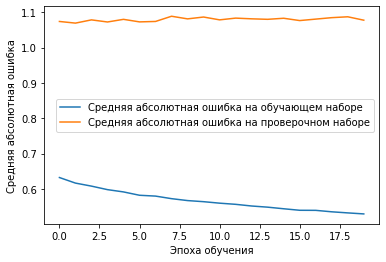

In [ ]:
#Простая Dense сеть
input1 = Input((xTrainScaled.shape[1],))
input2 = Input((xTrainC01.shape[1],))

x1 = Dense(10, activation="relu")(input1)
x2 = Dense(250, activation="relu")(input2)

x = concatenate([x1, x2])

x = Dense(100, activation='relu')(x)
x = Dense(10, activation='relu')(x)
x = Dense(1, activation='linear')(x)

model = Model((input1, input2), x)

model.compile(optimizer=Adam(lr=1e-3), loss='mse')
history = model.fit([xTrainScaled[~valMask], xTrainC01[~valMask]], 
                    yTrainScaled[~valMask], 
                    epochs=20, 
                    validation_data=([xTrainScaled[valMask], xTrainC01[valMask]], 
                    yTrainScaled[valMask]), 
                    verbose=0,
                    callbacks=[pltMae])

print()
print('Меняем шаг обучения на 1e-4')
model.compile(optimizer=Adam(lr=1e-4), loss='mse')
history = model.fit([xTrainScaled[~valMask], xTrainC01[~valMask]], 
                    yTrainScaled[~valMask], 
                    epochs=20, 
                    validation_data=([xTrainScaled[valMask], xTrainC01[valMask]], 
                    yTrainScaled[valMask]), 
                    verbose=0,
                    callbacks=[pltMae])

#Проверяем результаты
pred = model.predict([xTrainScaled[valMask], xTrainC01[valMask]]) #Полуаем выход сети на проверочной выборке
predUnscaled = yScaler.inverse_transform(pred).flatten() #Делаем обратное нормирование выхода к изначальным величинам цен квартир
yTrainUnscaled = yScaler.inverse_transform(yTrainScaled[valMask]).flatten() #Делаем такое же обратное нормирование yTrain к базовым ценам
delta = predUnscaled - yTrainUnscaled #Считаем разность предсказания и правильных цен
absDelta = abs(delta) #Берём модуль отклонения
print("Модуль ошибки", sum(absDelta) / (1e+6 * len(absDelta))) #Выводим усреднённую ошибку в миллионах рублей

#ВЫводим графики ошибки
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

Выводы:
* Первое, что было самым сложным это найти подходящую базу данных, выручил этот сайт https://opengovdata.ru/nl/dataset?page=3
* второе - это скалирование, в начале скалировал сразу данные поделив каждое значение на максимум по этому столбцу, на когда дошёл до получения результатов нейронки это создало некоторые проблемы
* возможно стоило оставить одну из категорий, так как есть подозрения что они взаимосвязаны, но это не проверялось